In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

import matplotlib.pyplot as plt

2024-06-04 19:23:35.025231: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_images, train_labels),  (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

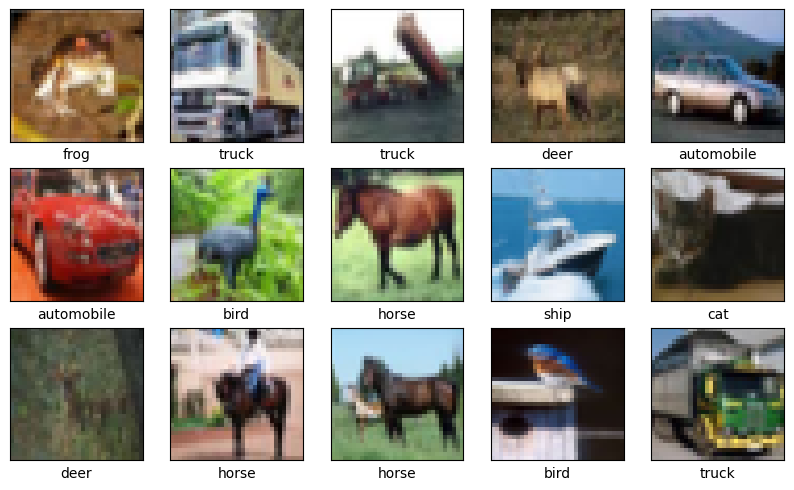

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])

    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [17]:
## Creating the Convolutional Neural Network model 
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='leaky_relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='leaky_relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

## Neural Network
model.add(layers.Flatten())
model.add(layers.Dense(48, activation='softmax'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10))

## Display model architecture
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 1, 1, 64)        

In [18]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-5, verbose=1, mode='auto')

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), callbacks=[reduce_lr])

Epoch 1/50
1563/1563 [==============================] - 61s 39ms/step - loss: 2.0977 - accuracy: 0.2179 - val_loss: 1.9249 - val_accuracy: 0.3102 - lr: 0.0010
Epoch 2/50
1563/1563 [==============================] - 60s 38ms/step - loss: 1.8564 - accuracy: 0.3228 - val_loss: 1.7059 - val_accuracy: 0.4251 - lr: 0.0010
Epoch 3/50
1563/1563 [==============================] - 68s 43ms/step - loss: 1.6897 - accuracy: 0.4021 - val_loss: 1.5391 - val_accuracy: 0.4772 - lr: 0.0010
Epoch 4/50
1563/1563 [==============================] - 62s 39ms/step - loss: 1.5777 - accuracy: 0.4414 - val_loss: 1.4532 - val_accuracy: 0.5119 - lr: 0.0010
Epoch 5/50
1563/1563 [==============================] - 67s 43ms/step - loss: 1.4902 - accuracy: 0.4750 - val_loss: 1.3927 - val_accuracy: 0.5294 - lr: 0.0010
Epoch 6/50
1563/1563 [==============================] - 62s 40ms/step - loss: 1.4142 - accuracy: 0.5060 - val_loss: 1.3439 - val_accuracy: 0.5487 - lr: 0.0010
Epoch 7/50
1563/1563 [========================

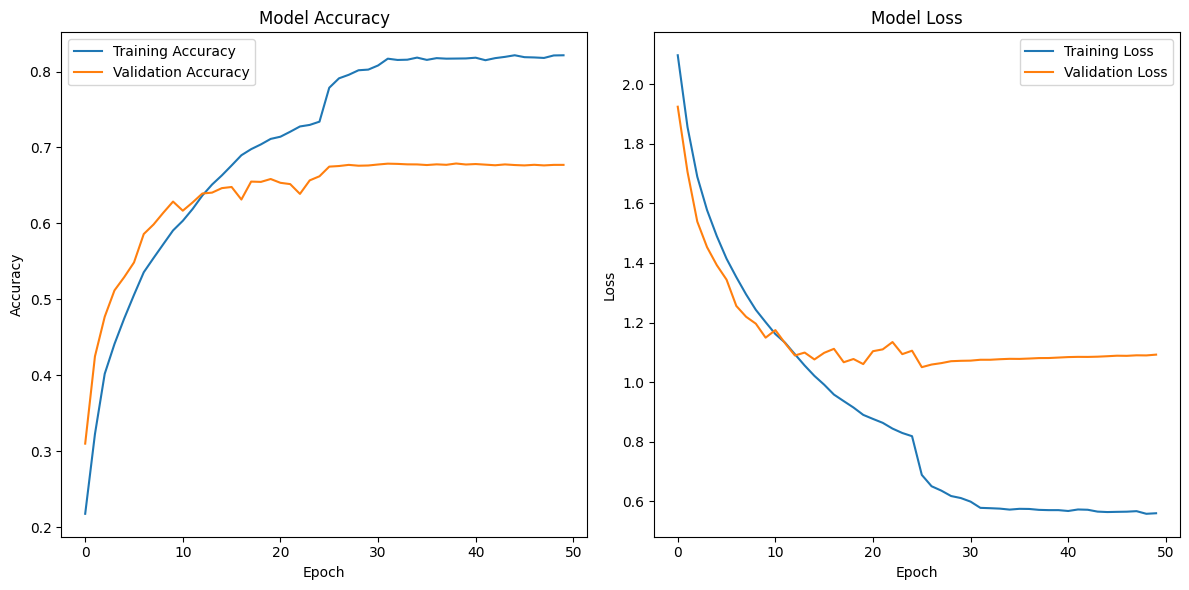

In [20]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
# Make predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_labels.flatten()

313/313 [==============================] - 2s 6ms/step


In [22]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)

# Calculate the accuracy score
test_accuracy = accuracy_score(test_labels, predicted_labels)
print(f"Accuracy Score: {test_accuracy:.3f}")

# Calculate the F1 Score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1:.3f}")

313/313 [==============================] - 2s 6ms/step - loss: 1.0922 - accuracy: 0.6771
Test accuracy: 0.6771000027656555
Test loss: 1.0921828746795654
Accuracy Score: 0.677
F1 Score: 0.676


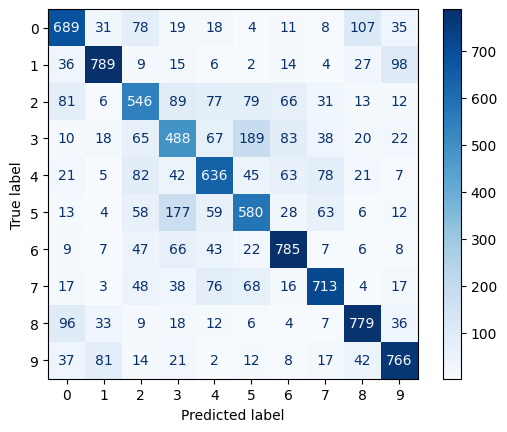

In [23]:
# Compute and display the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()